<a href="https://colab.research.google.com/github/RyoJ/YYRy0/blob/master/%E4%BC%BC%E3%81%A6%E3%82%8B%E4%BA%BA%E6%8E%A2%E3%81%97%E3%82%A2%E3%83%97%E3%83%AA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

定義：IMG_DIR, IMG_SIZE, target_img_path, target_img, bf, file, files, comparing_img_path, comparing_img, dist, ret, clearLabel, load_image, draw_image, pos, img_0, ax_0, fig,   

方法：1.ライブラリをインポート、2.現在の場所を決定、3.画像の取り込み、4.画像の比較、5.画像の表示

実装：1.スクレイピングで画像を収集、2.ターゲット画像と比較、3.画像と類似度を表示

*   画像の保存先を指定する（実行ファイル直下）
*   リスト項目



5.画像の表示：1.表示するための画像の読み込みと画像の表示の定義, 2.実際に画像を描写、エリア・ポジション・読み込みファイルの設定, 3.画像とラベルの表示,

In [0]:
#!/usr/bin/env python
# -*- coding: UTF-8 -*-

"""feature detection."""
#1.パッケージのインポート
import cv2
import os
from matplotlib import pyplot as plt
#%matplotlib inline #Colaboratoryの画像表示に必要

In [0]:
#2.GDriveへマウントする
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
print(os.path.abspath(os.path.dirname('似てる人探しアプリ2.ipynb')))

/content


In [0]:
#3.自分と有名人の画像比較
TARGET_FILE = 'ryo.jpg' #自分の画像
IMG_DIR = os.path.abspath(os.path.dirname('似てる人探しアプリ2.ipynb')) + '/gdrive/My Drive/Colab Notebooks/3.library/images/face_images/' #有名人の画像
IMG_SIZE = (200, 200)

target_img_path = IMG_DIR + TARGET_FILE
target_img = cv2.imread(target_img_path, cv2.IMREAD_GRAYSCALE)
target_img = cv2.resize(target_img, IMG_SIZE)

bf = cv2.BFMatcher(cv2.NORM_HAMMING)

/content/gdrive/My Drive/Colab Notebooks/3.library/images/face_images/


In [0]:
#4.類似度計算
#4-1.KAZE理論、
# detector = cv2.ORB_create()
detector = cv2.AKAZE_create()
(target_kp, target_des) = detector.detectAndCompute(target_img, None)

print('TARGET_FILE: %s' % (TARGET_FILE))

name = []#figure's title
sim = []#figure's similarity

files = os.listdir(IMG_DIR)
for file in files: #fileを定義
    if file == '.DS_Store':
        continue
    name.append(file)#add title's name

    comparing_img_path = IMG_DIR + file
    try:#２つの画像を比べている。読み込めないファイルがあったときは起こり得ない値を返す
        comparing_img = cv2.imread(comparing_img_path, cv2.IMREAD_GRAYSCALE)
        comparing_img = cv2.resize(comparing_img, IMG_SIZE)
        (comparing_kp, comparing_des) = detector.detectAndCompute(comparing_img, None)
        matches = bf.match(target_des, comparing_des)
        dist = [m.distance for m in matches]
        ret = sum(dist) / len(dist)
        ret = round(ret,2)#two decimal places 
    except cv2.error:
        ret = 100000
    sim.append(ret)#add similarity

    print(file, ret) #距離で出しているため小さいほど類似度が高い

TARGET_FILE: ryo.jpg
lena.png 132.47
kubotuka.jpg 133.76
oguri.jpg 137.16
ryo.jpg 0.0
himura.jpg 144.92
dog.png 141.78
salt.jpg 133.21
hiaveface_w.jpg 144.91


In [0]:
#名前と類似度が一緒のリスト（辞書）を作る
titles = dict(zip(name, sim))
print(titles)

{'lena.png': 132.47, 'kubotuka.jpg': 133.76, 'oguri.jpg': 137.16, 'ryo.jpg': 0.0, 'himura.jpg': 144.92, 'dog.png': 141.78, 'salt.jpg': 133.21, 'hiaveface_w.jpg': 144.91}


In [0]:
#5.画像の描写
#5-1.画像のラベルをクリアするメソッド
def clearLabel(_ax):
  _ax.tick_params(labelbottom="off",bottom="off")
  _ax.tick_params(labelleft="off",left="off")
  _ax.set_xticklabels([]) 
  _ax.axis('off')
  return _ax

In [0]:
#5.画像の描写
#5-2.表示するための画像の読み込みと画像の表示の定義=>画像の比較の際呼び出したデータは使えないのか？

def load_image(IMG_DIR, file):#画像の読み込み
  img_0=cv2.imread(IMG_DIR + file)#画像の読み込み
  #image_0=cv2.imread("gdrive/My Drive/Colab Notebooks/3.library/images/face_images/"+fname,0) #いらないかも
  img_0= cv2.cvtColor(img_0,cv2.COLOR_BGR2RGB)#RGBに変換する
  img_0=cv2.resize(img_0,IMG_SIZE)
  
  return img_0

def draw_image(fig, pos, img_1) :#位置の設定
  ax_0 = fig.add_subplot(1, 10, pos) #subplot(行、列、ポジション)
  clearLabel(ax_0)
  #for file in files:
  #plot_memo = "file"#ここにファイル名fileと類似度retを入れたい?
  #ax_0.annotate(plot_memo, xy=(0.5, 1.1), fontsize=16, xycoords='axes fraction', horizontalalignment='center')
  plt.imshow(img_1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


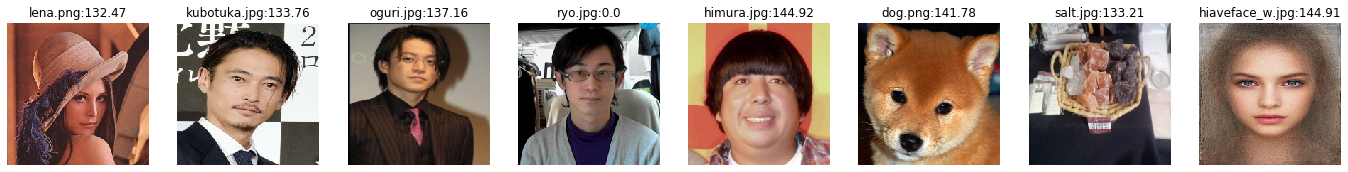

In [0]:
#5.画像の描写
#5-3.実際に画像を描写、エリア・ポジション・読み込みファイルの設定
fig = plt.figure(figsize=(30, 15))
files = os.listdir(IMG_DIR) #データのあるディレクトリを指定、データをfloat形式に保つために必要？
pos = 1
top = 0
for file in files:
    #if file == '.DS_Store':
        #continue
    ch = load_image(IMG_DIR, file) #実際に表示するファイルを指定
    draw_image(fig,pos,ch) #画像描写の引数としてエリア、ポジション、ファイルのパスを指定
    pos = pos + 1 #ポジションを指定
    plt.title(files[top]+':'+str(titles[file]))
    top = top + 1

In [0]:
pwd

'/content'

参考資料

*   似てる人探しアプリ：https://colab.research.google.com/drive/1i6KR9MR5nW9ZcZlIZO4RBnyZk_-6wD5i#scrollTo=3i6WRpMqKua9
*   リスト項目

